# SVM

## 0514~
PCA로 차원축소를 한 뒤 SVM을 적용해보자

PCA, tSNE...


# 추가적으로 확인해봐야할것(다음시간에..)

- overfitting등의 문제에 대해 더 찾아보자
- PCA를 이용해서 주성분분석을 하여 선형차원축소를 해보자

In [2]:
!pip install xgboost

    100% |████████████████████████████████| 114.0MB 255kB/s eta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 16.3MB/s ta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA

#  Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [5]:
data=pd.read_csv("./data/binary_winequalityN.csv")
#dataw=pd.read_csv("./data/1_white.csv")
#datar=pd.read_csv("./data/1_red.csv")

data=data.dropna(axis=0)  ##없애버림, 평균값 넣으려면 axis=0대신에 inplate=True 사용
#dataw=dataw.dropna(axis=0)

print "wine 데이터셋의 크기:" ,data.shape
print "\nwine 데이터셋의 키:", data.keys()

wine 데이터셋의 크기: (6463, 14)

wine 데이터셋의 키: Index([u'type', u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'binaryQuality'],
      dtype='object')


데이터셋의 키
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 14 columns):
type                    6463 non-null object
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
binaryQuality           6463 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 757.4+ KB


# 훈련 데이터와 테스트 데이터

In [7]:
#x_train에 적재하기 위한 2차원 배열의 특성 dataset을 만든다.
#6463*11(?) 사이즈

#실험의 편의성을 위해 data마다 이름을 붙였다.
f1=data['fixed acidity']
f2=data['volatile acidity']
f3=data['citric acid']
f4=data['residual sugar']
f5=data['chlorides']
f6=data['free sulfur dioxide']
f7=data['total sulfur dioxide']
f8=data['density']
f9=data['pH']
f10=data['sulphates']
f11=data['alcohol']


c_data=np.c_[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11]

In [11]:

X_train, X_test, y_train, y_test = train_test_split(c_data, data['quality'],random_state=0)

print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape


X_train 크기:  (4847, 11)
y_train 크기:  (4847,)
X_test 크기:  (1616, 11)
y_test 크기:  (1616,)


### 시간체크/PCA?
# 1. 전체 데이터

랜덤포레스트 일 때 시간 비교

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [14]:
print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 0.12s


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

##생각보다 랜덤포레스트 분류기라는애가 효과적? //0.6516089108910891

0.6516089108910891

pca이용할 때 --> 분산 95%되도록 차원 축소

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)##줄어든 애

In [28]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [29]:
print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 0.09s


비슷한듯? 여러번 해본 결과 더 빠를 때도 있고 느려질 때도 있음

In [31]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

## 꽤 감소 //0.504950495049505

0.504950495049505

정확도 감소--> 유용한 정보를 일부 잃었기 때문에 성는이 조금 감소 되는 것이 일반적이다.

## t-SNE사용해서 2D로 축소

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

#### 2차원 축소

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(c_data)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext

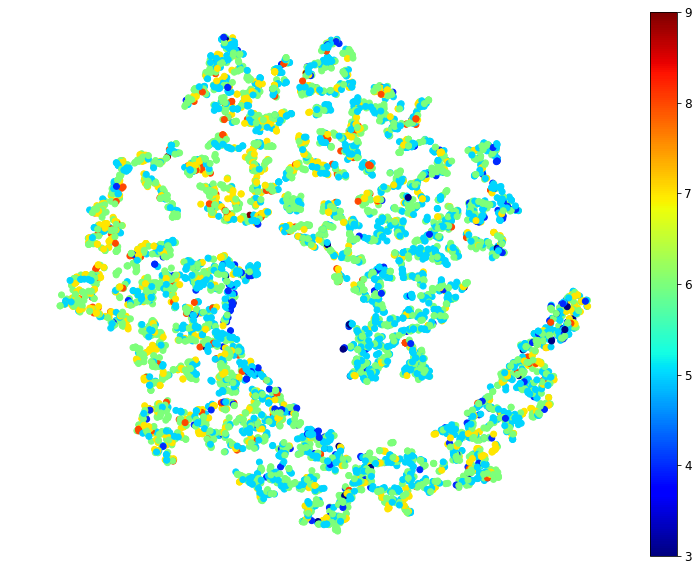

In [77]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c=data['quality'],
            cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

#### 3차원 축소

In [18]:
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D

In [121]:
tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(c_data)

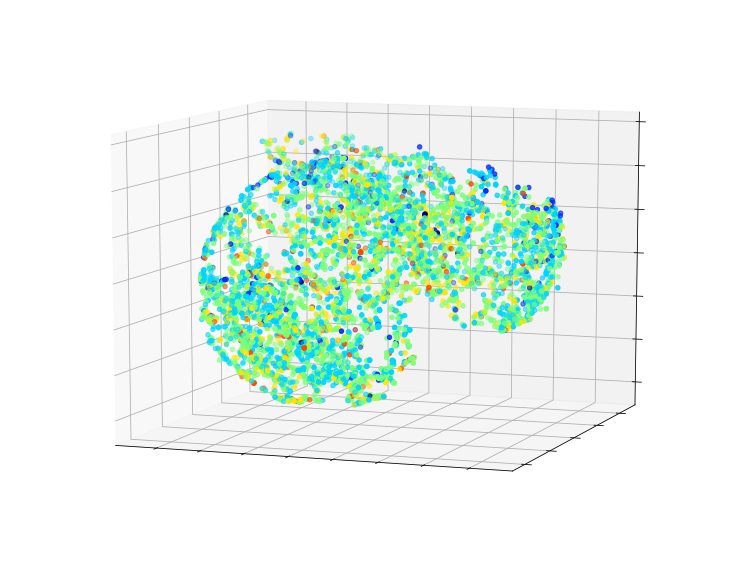

In [123]:
plt.figure(figsize=(13,10))
ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

전혀 분리가안된듯..그리고 두 개 정도 겹쳐지면 t-sne를 한번 더 써서 분리할 수도 있을 것 같은데 그냥 모든 데이터가 겹쳐져있음!

## PCA를 사용
#### 2차원 축소

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext

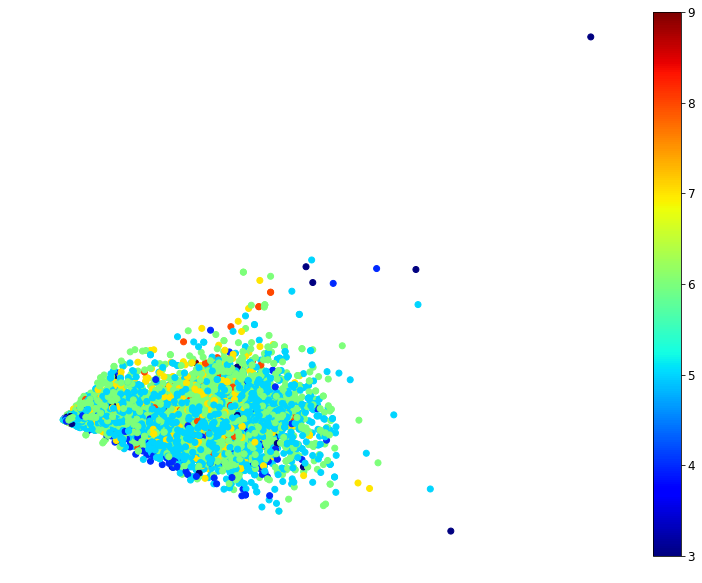

In [19]:
from sklearn.decomposition import PCA
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(c_data)
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0],
            X_pca_reduced[:, 1],
            c=data['quality'],
            cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

#### 3차원 축소


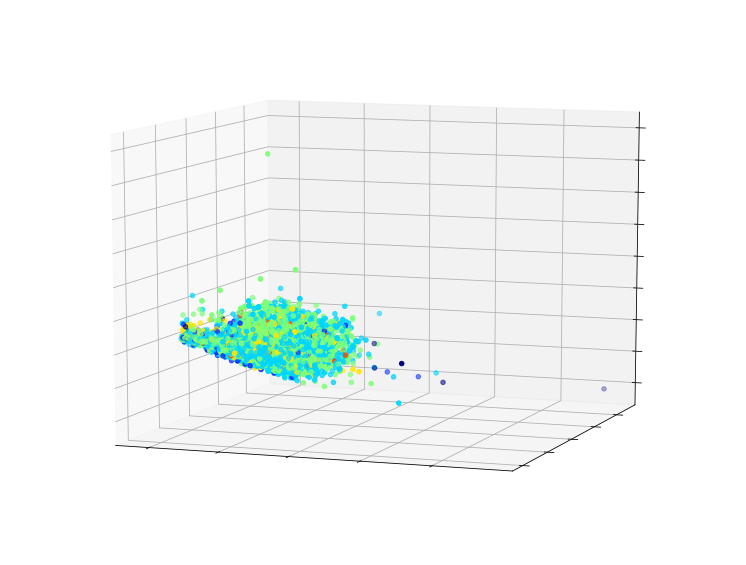

In [127]:
plt.figure(figsize=(13, 10))

X_pca_reduced = PCA(n_components=3, random_state=42).fit_transform(c_data)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], X_pca_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

PCA가 t-sne에 비하면 월등하게 빠르다. 하지만 결과는..역시나별로

## LLE를 사용
#### 2d

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext

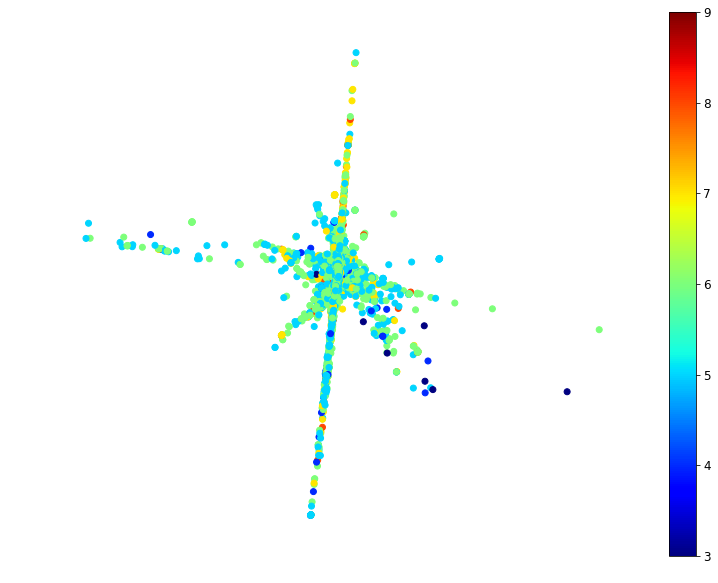

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(c_data)
plt.figure(figsize=(13,10))
plt.scatter(X_lle_reduced[:, 0],
            X_lle_reduced[:, 1],
            c=data['quality'],
            cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

#### 3d

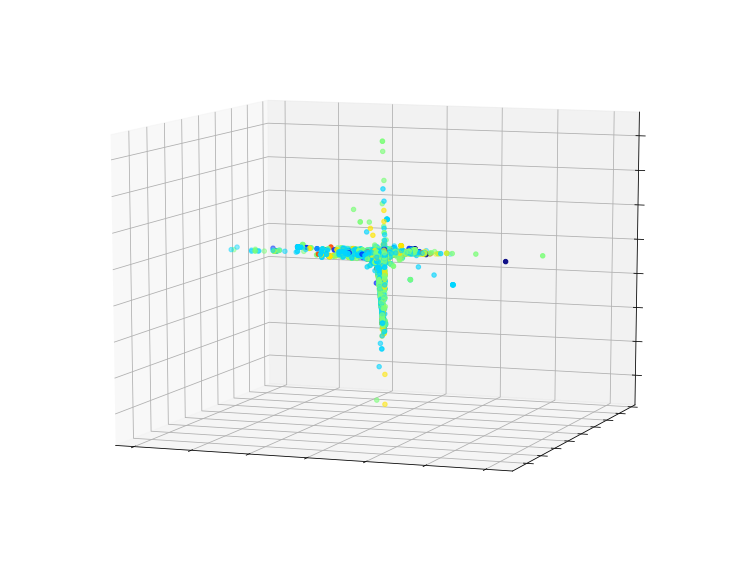

In [130]:
plt.figure(figsize=(13, 10))

X_lle_reduced = LocallyLinearEmbedding(n_components=3, random_state=42).fit_transform(c_data)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_lle_reduced[:, 0], X_lle_reduced[:, 1], X_lle_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

결과가 너무 안좋다. 

## MDS 해보기(시간이 너무 오래걸려서 못해봄 ㅠ)
#### 2d

In [21]:
from sklearn.manifold import MDS

X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(c_data)
plt.figure(figsize=(13,10))
plt.scatter(X_mds_reduced[:, 0],
            X_mds_reduced[:, 1],
            c=data['quality'],
            cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

KeyboardInterrupt: 

#### 3d

In [148]:
plt.figure(figsize=(13, 10))

X_mds_reduced = MDS(n_components=3, random_state=42).fit_transform(c_data)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_mds_reduced[:, 0], X_mds_reduced[:, 1], X_mds_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

KeyboardInterrupt: 

<Figure size 936x720 with 0 Axes>

## LDA 해보기
#### 2d

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext

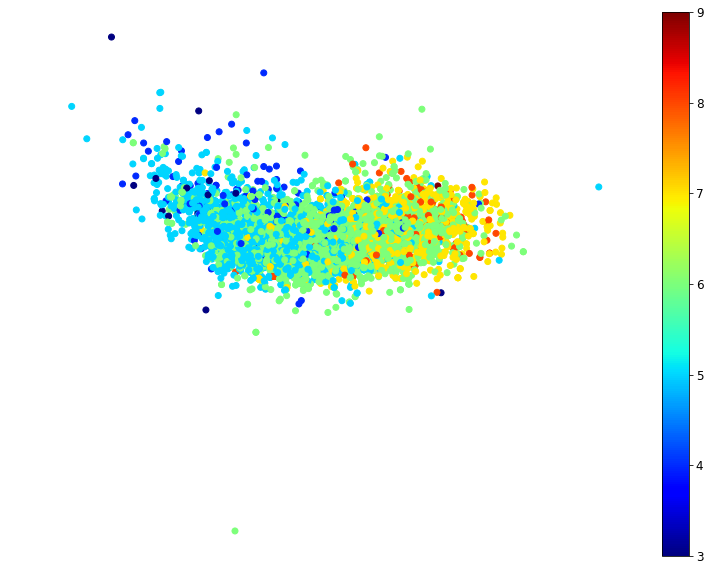

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(c_data, data['quality'])
plt.figure(figsize=(13,10))
plt.scatter(X_lda_reduced[:, 0],
            X_lda_reduced[:, 1],
            c=data['quality'],
            cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

#### 3d

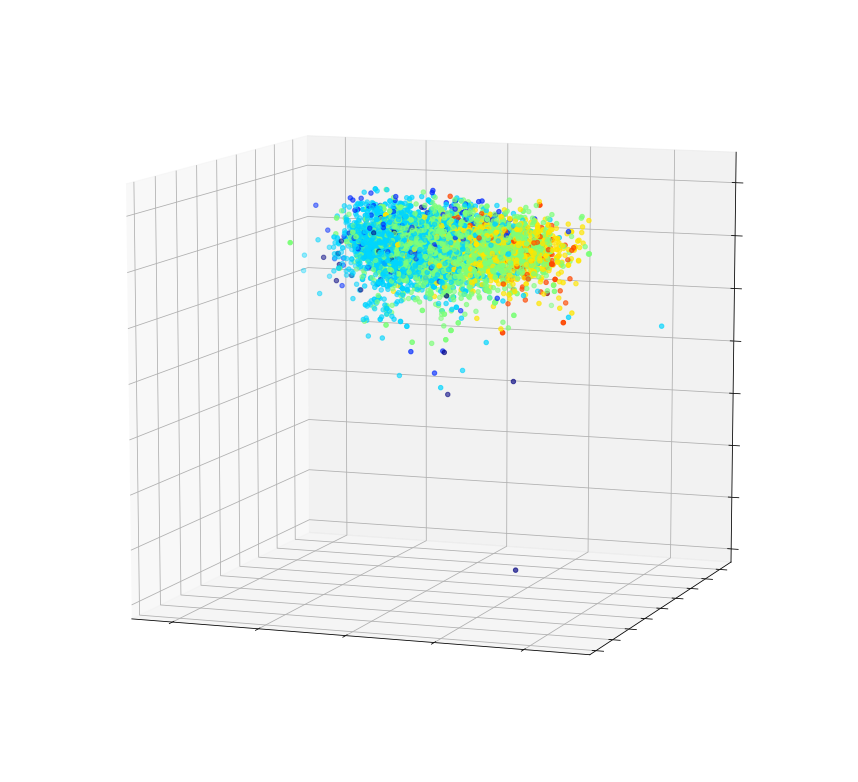

In [153]:
plt.figure(figsize=(15, 14))

X_lda_reduced = LinearDiscriminantAnalysis(n_components=3).fit_transform(c_data, data['quality'])

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], X_lda_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

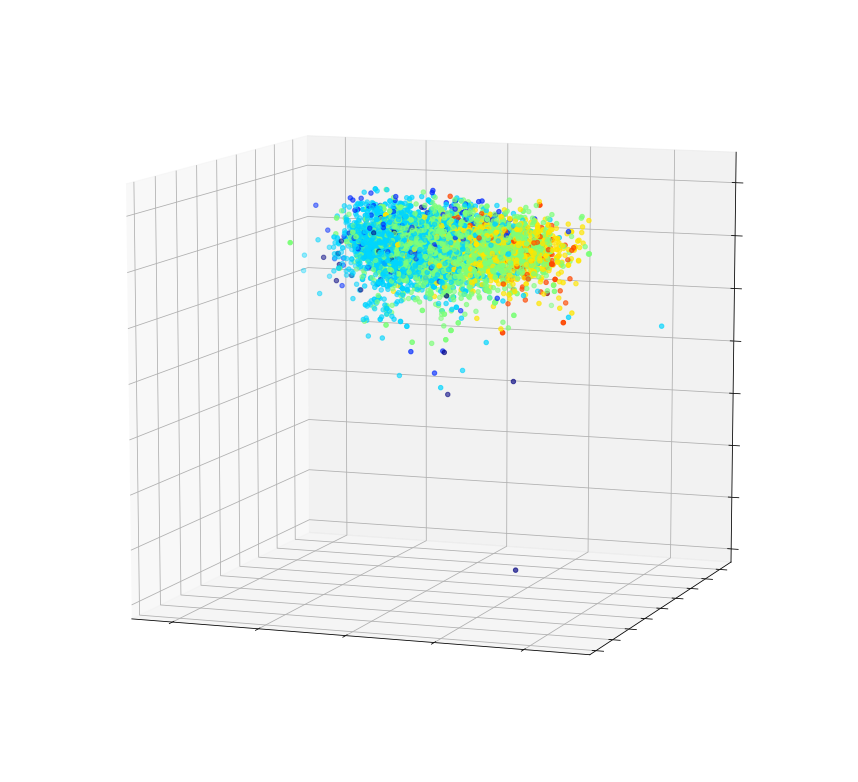

In [185]:
##6d test용
plt.figure(figsize=(15, 14))

X_lda_reduced = LinearDiscriminantAnalysis(n_components=6).fit_transform(c_data, data['quality'])

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], X_lda_reduced[:, 2], c=data['quality'], cmap="jet")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

##LDA 3차원
X_train, X_test, y_train, y_test = train_test_split(X_lda_reduced, data['quality'],random_state=0)


### 추측
그나마 LDE가 가장 잘 나올것같다. 그리고 이상치를 확인 할 방법이 없을까? svm으로 하면 가중치 영향을 받기 때문에 저걸 어떻게 처리를 해야할듯..?

---

### 어떤 데이터를 적재?

#### 원본 

In [186]:
## 원본
#X_train, X_test, y_train, y_test = train_test_split(c_data, data['quality'],random_state=0)

print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 6)
y_train 크기:  (4847,)
X_test 크기:  (1616, 6)
y_test 크기:  (1616,)


#### T-SNE

In [42]:
'''
##T-SNE 2차원
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, data['quality'],random_state=0)

'''
##T-SNE 3차원
tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, data['quality'],random_state=0)


print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 3)
y_train 크기:  (4847,)
X_test 크기:  (1616, 3)
y_test 크기:  (1616,)


#### PCA 

In [72]:
'''
##PCA 2차원
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced , data['quality'],random_state=0)

'''
##PCA 3차원
X_pca_reduced = PCA(n_components=3, random_state=42).fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced , data['quality'],random_state=0)


print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 3)
y_train 크기:  (4847,)
X_test 크기:  (1616, 3)
y_test 크기:  (1616,)


#### LLE 

In [117]:
'''
##LLE 2차원
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_lle_reduced, data['quality'],random_state=0)

'''
##LLE 3차원
X_lle_reduced = LocallyLinearEmbedding(n_components=3, random_state=42).fit_transform(c_data)
X_train, X_test, y_train, y_test = train_test_split(X_lle_reduced, data['quality'],random_state=0)


print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 3)
y_train 크기:  (4847,)
X_test 크기:  (1616, 3)
y_test 크기:  (1616,)


#### LDA 

In [150]:
'''
##LDA 2차원
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(c_data, data['quality'])
X_train, X_test, y_train, y_test = train_test_split(X_lda_reduced, data['quality'],random_state=0)

'''
##LDA 3차원
X_lda_reduced = LinearDiscriminantAnalysis(n_components=3).fit_transform(c_data, data['quality'])
X_train, X_test, y_train, y_test = train_test_split(X_lda_reduced, data['quality'],random_state=0)


print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 3)
y_train 크기:  (4847,)
X_test 크기:  (1616, 3)
y_test 크기:  (1616,)


---

## SVM

In [187]:
from sklearn.svm import SVC, LinearSVC

## SVM 분류기

OvA를 사용하여 분류

In [188]:
from sklearn.svm import LinearSVR
lin_clf = LinearSVC(max_iter=100000, random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

#### 훈련 set에 대한 예측을 만들어 정확도를 측정

In [189]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)
##(11개)quality로 했을 때: 0.5188776562822365
##(9개)quality로 했을 때: 0.5283680627192078
##(7개)quality로 했을 때: 0.5203218485661234
##(5개)quality로 했을 때: 0.5141324530637508

##(11개)이진분류: 0.7437590262017743
##(9개)이진분류: 0.7313802351970291
##(7개)이진분류: 0.7317928615638539
##(5개)이진분류: 0.7198266969259336

##T-SNE 2차원: 0.42954404786465855
##T-SNE 3차원: 0.4384155147513926

##PCA 2차원: 0.43965339385186714
##PCA 3차원: 0.4375902620177429

##LLE 2차원: 0.43222611924902
##LLE 3차원: 0.43222611924902

##LDA 2차원: 0.5310501341035693
##LDA 3차원: 0.5285743759026201
##LDA 6차원: 0.5312564472869816

0.5312564472869816

#### data의 scale 조정

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [191]:
lin_clf = LinearSVC(max_iter=100000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [192]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##(11개)quality로 했을 때: 0.5289870022694451
##(9개)quality로 했을 때: 0.5302248813699195
##(7개)quality로 했을 때: 0.5242417990509594
##(5개)quality로 했을 때: 0.5230039199504848

##(11개)이진분류: 0.7404580152671756
##(9개)이진분류: 0.7439653393851867
##(7개)이진분류: 0.7435527130183619
##(5개)이진분류: 0.7412832680008252

##T-SNE 2차원: 0.42954404786465855
##T-SNE 3차원: 0.4384155147513926

##PCA 2차원: 0.4384155147513926
##PCA 3차원: 0.4380028883845678

##LLE 2차원: 0.4330513719826697
##LLE 3차원: 0.4330513719826697

##LDA 2차원: 0.5310501341035693
##LDA 3차원: 0.5285743759026201
##LDA 6차원: 0.5312564472869816

0.5312564472869816

#### RBF 커널 적용

In [193]:
svm_clf = SVC(gamma='auto', decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:4847], y_train[:4847]) ##4847개 data로 모델 훈련

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [194]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##(11개)quality로 했을 때: 0.6075923251495771
##(9개)quality로 했을 때: 0.594800907778007
##(7개)quality로 했을 때: 0.5737569630699402
##(5개)quality로 했을 때: 0.5541572106457603

##(11개)이진분류: 0.796162574788529
##(9개)이진분류: 0.7924489374871054
##(7개)이진분류: 0.7815143387662472
##(5개)이진분류: 0.7542809985558078

##T-SNE 2차원: 0.44316071796987827
##T-SNE 3차원: 0.45615844852486076

##PCA 2차원: 0.4479059211883639
##PCA 3차원: 0.4578089539921601

##LLE 2차원: 0.4487311739220136
##LLE 3차원: 0.4472869816381267

##LDA 2차원: 0.547142562409738
##LDA 3차원: 0.551062512894574
##LDA 6차원: 0.5832473695069115

0.5832473695069115

#### 교차 검증 이용한 랜덤 서치로 hyper parameter 튜닝

test 위해 1000개만 해봄

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, cv=3, n_iter=10, verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3c2dacb10>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3c2dac110>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [196]:
rnd_search_cv.best_estimator_

SVC(C=1.951731344841974, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.029158873718082578,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [197]:
rnd_search_cv.best_score_
##(11개)quality로 했을 때: 0.523
##(9개)quality로 했을 때: 0.521
##(7개)quality로 했을 때: 0.516
##(5개)quality로 했을 때: 0.518

##(11개)이진분류: 0.745
##(9개)이진분류: 0.753
##(7개)이진분류: 0.749
##(5개)이진분류: 0.74

##T-SNE 2차원: 0.425
##T-SNE 3차원: 0.426

##PCA 2차원: 0.425
##PCA 3차원: 0.425

##LLE 2차원: 0.43
##LLE 3차원: 0.428

##LDA 2차원: 0.524
##LDA 3차원: 0.519
##LDA 6차원: 0.521

0.521

1000개만 해서 그런가 낮다.  
이제 전체에 대해 해보자

In [198]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=1.951731344841974, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.029158873718082578,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [199]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##(11개)quality로 했을 때: 0.5970703527955437
##(9개)quality로 했을 때: 0.5320817000206313
##(7개)quality로 했을 때: 0.5479678151433877
##(5개)quality로 했을 때: 0.5438415514751392

##(11개)이진분류: 0.8116360635444605
##(9개)이진분류: 0.7831648442335465
##(7개)이진분류: 0.7672787291107902
##(5개)이진분류: 0.7478852898700227

##T-SNE 2차원: 0.43222611924902
##T-SNE 3차원: 0.44109758613575406

##PCA 2차원: 0.4369713224675057
##PCA 3차원: 0.43243243243243246

##LLE 2차원: 0.44295440478646586
##LLE 3차원: 0.4353208170002063

##LDA 2차원: 0.5428099855580771
##LDA 3차원: 0.5300185681865072
##LDA 6차원: 0.5467299360429131

0.5467299360429131

In [203]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
##(11개)quality로 했을 때: 0.5792079207920792
##(9개)quality로 했을 때: 0.5482673267326733
##(7개)quality로 했을 때: 0.557549504950495
##(5개)quality로 했을 때: 0.5544554455445545

##(11개)이진분류: 0.7803217821782178
##(9개)이진분류: 0.7648514851485149
##(7개)이진분류: 0.7660891089108911
##(5개)이진분류: 0.7561881188118812

##T-SNE 2차원: 0.44863861386138615
##T-SNE 3차원: 0.4399752475247525

##PCA 2차원: 0.44925742574257427
##PCA 3차원: 0.44863861386138615

##LLE 2차원: 0.44925742574257427
##LLE 3차원: 0.44801980198019803

##LDA 2차원: 0.5495049504950495
##LDA 3차원: 0.5464108910891089
##LDA 6차원: 0.5501237623762376

0.5501237623762376